# Constants

In [1]:
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 300
MAX_WORDS = 100000

## Common english contraction mappings (wikipedia):
https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions

In [2]:
CONTRACTION_MAPPING = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [3]:
PUNCT = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

In [4]:
SPECIAL_PUNCT = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}

In [5]:
PUNCT_MAPPING = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [6]:
MISPELL_MAPPING = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization', 'pokémon': 'pokemon'}

# Helpers

## Embedding helpers

In [7]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import os

def loadEmbeddings(path, dimensions, mode='r', encoding=None, errors=None):
    print('Loading embeddings from: %s' %path)
    embeddings = {}
    f = open(path, buffering=((2<<16) + 8), mode=mode, encoding=encoding, errors=errors)
    for line in f:
        if len(line) <= 100:
            continue
        values = line.split()
        word = ''.join(values[:-dimensions])
        coefs = np.asarray(values[-dimensions:], dtype='float32')
        embeddings[word] = coefs
    f.close()
    print('Found %s word vectors.' % len(embeddings))
    return embeddings

In [8]:
def loadEmbeddingsGensim(path, dimensions, binary=True):
    print('Loading embeddings from: %s' %path)
    embeddings = {}
    gensim_vecs = KeyedVectors.load_word2vec_format(path, binary=binary)
    for word, vector in zip(gensim_vecs.vocab, gensim_vecs.vectors):
        coefs = np.asarray(vector[-dimensions:], dtype='float32')
        embeddings[word] = coefs
    print('Found %s word vectors.' % len(embeddings))
    return embeddings

In [9]:
def getEmbeddingMatrix(embedding, word_index):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    
    nb_words = min(MAX_WORDS, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= MAX_WORDS:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

### Helper to replace contractions in dataset

In [10]:
def clean_contractions(text):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([CONTRACTION_MAPPING[t] if t in CONTRACTION_MAPPING else t for t in text.split(" ")])
    return text

### Helper to remap punctuations in dataset

In [11]:
def clean_special_chars(text):
    for p in PUNCT_MAPPING:
        text = text.replace(p, PUNCT_MAPPING[p])
    
    for p in PUNCT:
        text = text.replace(p, ' ' + p + ' ')
    
    for s in SPECIAL_PUNCT:
        text = text.replace(s, SPECIAL_PUNCT[s])
    
    return text

### Helper to correct common mispellings

In [12]:
def correct_spelling(x):
    for word in MISPELL_MAPPING.keys():
        x = x.replace(word, MISPELL_MAPPING[word])
    return x

## Coverage helpers

In [13]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [14]:
import operator

def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

# Import test/train dataset

In [15]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1

# Analyze train and test data

In [16]:
print("Sample insincere questions")
train_df.loc[train_df['target'] == 1].sample(10)

Sample insincere questions


,qid,question_text,target
506825,633ca3709f7705288ac3,"Why are European-Americans so argumentative, especially towards black people? No matter what question we ask we get attacked?",1
1199708,eb22cf25df2523c76ad8,Did you guys hear about Trump launching missiles at Russia and Syria?,1
609811,776a111643f041ef66ee,Why are Pakistanis obsessed with Iran and Iranian people?,1
399700,4e4edf66de48b44613c3,"Why is it that when an Christian tells you that you are doomed to rot in hell for being a stupid arrogant heretic it's ok but when an atheist questions the irrationality of their beliefs they are called ""disrespectful"", ""aggressive"" and such?",1
792185,9b39e3cc9dc0623a359a,Why do Ayurvedic doctos hype so much about Ayurveda though it is not true in reality?,1
560831,6dddd8810f5cbec3f3d2,Why is left wing violence given a pass in the news?,1
478108,5d9f3bf33afd5af4c1c1,"Does our government cover up evidence of God, like it does the remains of giants found all over the world?",1
89506,118aa979738056a26aef,How can people celebrate Emma Gonzalez after she publicly ripped up the Constitution?,1
827288,a220cb0523ada5763d54,Why are white women pretending racism was only the white men fault?,1
29642,05cc69301509a5fafa96,Why are drivers so stupid?,1


In [17]:
print("Sample sincere questions")
train_df.loc[train_df['target'] == 0].sample(10)

Sample sincere questions


,qid,question_text,target
711329,8b415fe58fe211e08fa0,What is justice to you when no one is looking?,0
11925,02580a7411b06fca24ef,Which selective chapter should I study to score 100 marks in Jee Advanced? Pls mention only topics.,0
1264265,f7c36091c1d0d4f34c51,What are the best creams for breast tighten?,0
969540,bdf796e6f404ceb86da7,What does mpv means?,0
333451,415acf94c45737d57011,What happend when acetonitril undergoes acid hydrolysis?,0
234206,2dced7b2a9adfd755fb5,Why are literacy tests have been administered by various governments to immigrants?,0
477919,5d95a0b6f7213391b1ad,How do I know if a girl I just started being friends with loves me or not?,0
762944,95792ab2e5743961f1c7,How is living in London?,0
932394,b6b8ed07df188c1cd4fa,What do you think could be the main cause or contribution to cultural blasphemy in African countries?,0
631821,7bba80e90ea53e3ed5fd,Why does black symbolize power?,0


In [18]:
import numpy as np


target_ratios = train_df.target.value_counts(normalize=True)

print(target_ratios)

target_ratios.plot(kind='bar', title='Ratios (target)')

0    0.93813
1    0.06187
Name: target, dtype: float64


In [19]:
print('Average word length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x.split())))))

Average word length of questions in train is 13.
Average word length of questions in test is 13.


In [20]:
print('Max word length of questions in train is {0:.0f}.'.format(np.max(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of questions in test is {0:.0f}.'.format(np.max(test_df['question_text'].apply(lambda x: len(x.split())))))

Max word length of questions in train is 134.
Max word length of questions in test is 87.


In [21]:
print('Average character length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x)))))
print('Average character length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x)))))

Average character length of questions in train is 71.
Average character length of questions in test is 70.


In [22]:
print('Max character length of questions in train is {0:.0f}.'.format(np.max(train_df['question_text'].apply(lambda x: len(x)))))
print('Max character length of questions in test is {0:.0f}.'.format(np.max(test_df['question_text'].apply(lambda x: len(x)))))

Max character length of questions in train is 1017.
Max character length of questions in test is 588.


In [23]:
print('p999 character length of questions in train is {0:.0f}.'.format(np.percentile(train_df['question_text'].apply(lambda x: len(x)), 99.9)))
print('p999 character length of questions in test is {0:.0f}.'.format(np.percentile(test_df['question_text'].apply(lambda x: len(x)), 99.9)))

p999 character length of questions in train is 249.
p999 character length of questions in test is 249.


# Data processing


## TODO: Feature engineering

Add feature engineering here.

In [24]:
%%time

train_df['treated_question'] = train_df['question_text'].apply(lambda x: x.lower())
train_df['treated_question'] = train_df['treated_question'].apply(lambda x: clean_contractions(x))
train_df['treated_question'] = train_df['treated_question'].apply(lambda x: clean_special_chars(x))
train_df['treated_question'] = train_df['treated_question'].apply(lambda x: correct_spelling(x))

test_df['treated_question'] = test_df['question_text'].apply(lambda x: x.lower())
test_df['treated_question'] = test_df['treated_question'].apply(lambda x: clean_contractions(x))
test_df['treated_question'] = test_df['treated_question'].apply(lambda x: clean_special_chars(x))
test_df['treated_question'] = test_df['treated_question'].apply(lambda x: correct_spelling(x))

CPU times: user 52 s, sys: 340 ms, total: 52.3 s
Wall time: 52.3 s


## Split train/validation

In [25]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

## Fill data

In [26]:
X_train = train_df['treated_question'].fillna('+++').tolist()
X_val = val_df['treated_question'].fillna('+++').tolist()
X_test = test_df['treated_question'].fillna('+++').tolist()

y_train = train_df['target']
y_val = val_df['target']

print('Found %s training questions.' % len(X_train))
print('Found %s validation questions.' % len(X_val))
print('Found %s test questions.' % len(X_test))

Found 1044897 training questions.
Found 261225 validation questions.
Found 56370 test questions.


In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=MAX_WORDS, lower=True, split=' ', 
                       char_level=False, oov_token=None, document_count=0,
                      )
                                   
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Shape of X_train: (1044897, 250)
Shape of y_train: (1044897,)
Found 174033 unique tokens.


## Save tokenized data + word index (optional)

In [29]:
'''
%%time

import pickle

test_df.to_pickle('test_df.pkl')

np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)
np.save('X_test.npy', X_test)

y_train.to_pickle('y_train.pkl')
y_val.to_pickle('y_val.pkl')

pickle.dump(word_index, open('word_index.pkl', 'wb'))
'''

CPU times: user 76 ms, sys: 1.4 s, total: 1.48 s
Wall time: 6.16 s


## Build vocabulary with counts

In [28]:
%%time

vocab = build_vocab(pd.concat([train_df['treated_question'], val_df['treated_question'], test_df['treated_question']]))

CPU times: user 9.14 s, sys: 544 ms, total: 9.69 s
Wall time: 9.69 s


## Load embeddings, measure coverage and save embedding matrix

In [29]:
%%time

print('glove:')
glove_path = '../input/embeddings/glove.840B.300d/glove.840B.300d.txt'
embeddings_index = loadEmbeddings(glove_path, EMBEDDING_DIM)
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
np.save('glove.npy', embedding_matrix)

glove:
Loading embeddings from: ../input/embeddings/glove.840B.300d/glove.840B.300d.txt
Found 2195892 word vectors.
Found embeddings for 63.10% of vocab
Found embeddings for  99.39% of all text
CPU times: user 2min 42s, sys: 6.71 s, total: 2min 49s
Wall time: 2min 49s


In [30]:
print('paragram:')
paragram_path = '../input/embeddings/paragram_300_sl999/paragram_300_sl999.txt'
embeddings_index = loadEmbeddings(paragram_path, EMBEDDING_DIM, encoding='utf8', errors='ignore')
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
np.save('paragram.npy', embedding_matrix)

paragram:
Loading embeddings from: ../input/embeddings/paragram_300_sl999/paragram_300_sl999.txt
Found 1703663 word vectors.
Found embeddings for 74.06% of vocab
Found embeddings for  99.64% of all text


In [31]:
print('wiki:')
wiki_path = '../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec'
embeddings_index = loadEmbeddings(wiki_path, EMBEDDING_DIM)
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
np.save('wiki.npy', embedding_matrix)

wiki:
Loading embeddings from: ../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec
Found 999994 word vectors.
Found embeddings for 48.05% of vocab
Found embeddings for  98.81% of all text


In [32]:
print('google_news:')
google_news_path = '../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings_index = loadEmbeddingsGensim(google_news_path, EMBEDDING_DIM)
check_coverage(vocab, embeddings_index)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index)
del embeddings_index
np.save('google_news.npy', embedding_matrix)

google_news:
Loading embeddings from: ../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin
Found 3000000 word vectors.
Found embeddings for 38.68% of vocab
Found embeddings for  78.84% of all text


# Oversample training data

In [33]:
'''
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
'''


'\nfrom imblearn.over_sampling import SMOTE\n\nsm = SMOTE(random_state=42, ratio = 1.0)\nX_train, y_train = sm.fit_sample(X_train, y_train)\n'

In [34]:
'''
balanced_train_df = pd.DataFrame()
balanced_train_df[0] = np.array(y_train)

target_ratios = balanced_train_df[0].value_counts(normalize=True)

print(target_ratios)

target_ratios.plot(kind='bar', title='Ratios after SMOTE (target)')
'''

"\nbalanced_train_df = pd.DataFrame()\nbalanced_train_df[0] = np.array(y_train)\n\ntarget_ratios = balanced_train_df[0].value_counts(normalize=True)\n\nprint(target_ratios)\n\ntarget_ratios.plot(kind='bar', title='Ratios after SMOTE (target)')\n"

# Setup model

# Restore point (optional)

In [74]:
'''
%%time

import numpy as np
import pandas as pd
import pickle

test_df = pd.read_pickle('test_df.pkl')

X_train = np.load('X_train.npy')
X_val = np.load('X_val.npy')
X_test = np.load('X_test.npy')

y_train = pd.read_pickle('y_train.pkl')
y_val = pd.read_pickle('y_val.pkl')

word_index = pickle.load(open('word_index.pkl', 'rb'))
'''

CPU times: user 68 ms, sys: 1.02 s, total: 1.08 s
Wall time: 1.08 s


## Embeddings Layers

In [35]:
from keras.layers import Embedding

embedding_layers = {}

embedding_matrix = np.load('glove.npy')
embedding_layers['glove'] = Embedding(MAX_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

embedding_matrix = np.load('paragram.npy')
embedding_layers['paragram'] = Embedding(MAX_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

embedding_matrix = np.load('wiki.npy')
embedding_layers['wiki'] = Embedding(MAX_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

embedding_matrix = np.load('google_news.npy')
embedding_layers['google_news'] = Embedding(MAX_WORDS, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

In [36]:
del word_index

## NN: Bidirectional GRU per embedding with concactenation

In [66]:
%%time 

from keras.layers import Dense, Dropout, Input, GlobalMaxPool1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Bidirectional
from keras.layers import Activation, BatchNormalization, CuDNNGRU
from keras.layers import SpatialDropout1D, Concatenate, Flatten, Reshape
from keras.regularizers import l2
from keras.models import Model


inp = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

a = embedding_layers['glove'] (inp)
a = Bidirectional(CuDNNGRU(64, return_sequences=True))(a)
a = BatchNormalization()(a)
a = GlobalMaxPool1D()(a)
a = Dense(16, use_bias=False)(a)
a = BatchNormalization()(a)
a = Activation("relu")(a)
a = Dropout(0.1)(a)

b = embedding_layers['paragram'] (inp)
b = Bidirectional(CuDNNGRU(64, return_sequences=True))(b)
b = BatchNormalization()(b)
b = GlobalMaxPool1D()(b)
b = Dense(16, use_bias=False)(b)
b = BatchNormalization()(b)
b = Activation("relu")(b)
b = Dropout(0.1)(b)

c = embedding_layers['wiki'] (inp)
c = Bidirectional(CuDNNGRU(64, return_sequences=True))(c)
c = BatchNormalization()(c)
c = GlobalMaxPool1D()(c)
c = Dense(16, use_bias=False)(c)
c = BatchNormalization()(c)
c = Activation("relu")(c)
c = Dropout(0.1)(c)

d = embedding_layers['google_news'] (inp)
d = Bidirectional(CuDNNGRU(64, return_sequences=True))(d)
d = BatchNormalization()(d)
d = GlobalMaxPool1D()(d)
d = Dense(16, use_bias=False)(d)
d = BatchNormalization()(d)
d = Activation("relu")(d)
d = Dropout(0.1)(d)

x = Concatenate(axis=1)([a, b, c])
x = Dense(32, use_bias=False)(x)
x = BatchNormalization()(x)
#kernel_regularizer=l2(0.01)
x = Activation("relu")(x)
x = Dense(1, use_bias=False)(x)
x = BatchNormalization()(x)
out = Activation("sigmoid")(x)

model = Model(inp, out)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 250)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 250, 300)     30000000    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 250, 300)     30000000    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 250, 300)     30000000    input_3[0][0]                    
__________________________________________________________________________________________________
bidirectio

# Compile the model

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model

Use model checkpointing to save the model that attains the best validation loss.

In [85]:
%%time 

hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=512)

Train on 1044897 samples, validate on 261225 samples
Epoch 1/1
1044897/1044897 [==============================] - 386s 370us/step - loss: 0.1150 - acc: 0.9618 - val_loss: 0.1084 - val_acc: 0.9601
CPU times: user 5min 15s, sys: 50.3 s, total: 6min 5s
Wall time: 6min 26s


# Predict validation labels

In [86]:
%%time

pred_val = model.predict([X_val], batch_size=1024, verbose=1)

261225/261225 [==============================] - 22s 86us/step
CPU times: user 20.5 s, sys: 4.69 s, total: 25.2 s
Wall time: 22.5 s


# Find best threshold

In [87]:
from sklearn.metrics import f1_score

def bestThreshold(y_true,y_pred):
    idx = 0
    cur_f1 = 0
    max_f1 = 0
    thres = 0
    for idx in np.arange(0.1, 0.501, 0.01):
        cur_f1 = f1_score(y_true, np.array(y_pred)> idx)
        print('Current threshold is {:.4f} with F1 score: {:.4f}'.format(idx, cur_f1))
        if cur_f1 > max_f1:
            max_f1 = cur_f1
            thres = idx
    print('best threshold is {:.4f} with F1 score: {:.4f}'.format(thres, max_f1))
    return thres
threshold = bestThreshold(y_val,pred_val)

Current threshold is 0.1000 with F1 score: 0.5991
Current threshold is 0.1100 with F1 score: 0.6110
Current threshold is 0.1200 with F1 score: 0.6214
Current threshold is 0.1300 with F1 score: 0.6302
Current threshold is 0.1400 with F1 score: 0.6376
Current threshold is 0.1500 with F1 score: 0.6442
Current threshold is 0.1600 with F1 score: 0.6496
Current threshold is 0.1700 with F1 score: 0.6539
Current threshold is 0.1800 with F1 score: 0.6583
Current threshold is 0.1900 with F1 score: 0.6621
Current threshold is 0.2000 with F1 score: 0.6656
Current threshold is 0.2100 with F1 score: 0.6678
Current threshold is 0.2200 with F1 score: 0.6689
Current threshold is 0.2300 with F1 score: 0.6705
Current threshold is 0.2400 with F1 score: 0.6719
Current threshold is 0.2500 with F1 score: 0.6735
Current threshold is 0.2600 with F1 score: 0.6734
Current threshold is 0.2700 with F1 score: 0.6733
Current threshold is 0.2800 with F1 score: 0.6733
Current threshold is 0.2900 with F1 score: 0.6740


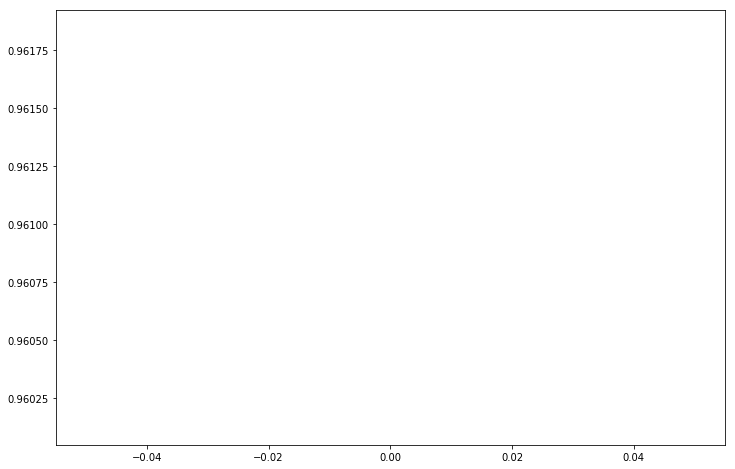

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['acc'], label='Train Accuracy')
plt.plot(hist.history['val_acc'], label='Test Accuracy')
plt.show()

# serialize model

In [89]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk


# serialize weights

In [90]:
model.save_weights("weights.h5")
print("Saved model weights to disk")

Saved model weights to disk


# Predict test labels

In [91]:
%%time

pred_test = model.predict([X_test], batch_size=1024, verbose=1)

56370/56370 [==============================] - 5s 86us/step
CPU times: user 4.41 s, sys: 1.02 s, total: 5.44 s
Wall time: 4.85 s


# Prepare submission

In [92]:
submission_df = pd.DataFrame({"qid":test_df["qid"].values})
submission_df['prediction'] = (pred_test > threshold).astype(int)
submission_df.to_csv("submission.csv", index=False)